# Table of Contents

## 1. Importing libraries and data
## 2. Grouped by species data
#### 2.a. Data cleaning
#### 2.b. Data prep for regression analysis
#### 2.c. Regression analysis
## 3. All data
#### 3.a. Data cleaning
#### 3.b. Data prep for regression analysis
#### 3.c. Regression analysis

## 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = '/Users/lynnsey/Desktop/Bootcamp/Tasks/Immersion/Task 6/09-07-2023 Living Planet Index Analysis'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'birds_v7.csv'))

## 2. Grouped by species data

### 2.a Data cleaning

In [6]:
df.columns

Index(['id', 'scientific_name', 'class', 'order', 'family', 'genus', 'species',
       'common_name', 'country', 'region', 'system', 'avg_1950_to_1974',
       'avg_1975_to_1999', 'avg_2000_to_2020', '1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'],
      dtype='object')

In [7]:
df.head(20)

,id,scientific_name,class,order,family,genus,species,common_name,country,region,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Balearica_regulorum,Aves,Gruiformes,Gruidae,Balearica,regulorum,Grey-crowned crane,Uganda,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Acrocephalus_sechellensis,Aves,Passeriformes,Acrocephalidae,Acrocephalus,sechellensis,Seychelles warbler,Seychelles,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Copsychus_sechellarum,Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,Seychelles magpie-robin,Seychelles,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Copsychus_sechellarum,Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,Seychelles magpie-robin,Seychelles,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Falco_punctatus,Aves,Falconiformes,Falconidae,Falco,punctatus,Mauritius kestrel,Mauritius,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Pternistis_ochropectus,Aves,Galliformes,Phasianidae,Pternistis,ochropectus,Djibouti francolin,Djibouti,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Gyps_coprotheres,Aves,Accipitriformes,Accipitridae,Gyps,coprotheres,Cape vulture,Botswana,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Gyps_coprotheres,Aves,Accipitriformes,Accipitridae,Gyps,coprotheres,Cape vulture,Lesotho,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Gyps_coprotheres,Aves,Accipitriformes,Accipitridae,Gyps,coprotheres,Cape vulture,Mozambique,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Gyps_coprotheres,Aves,Accipitriformes,Accipitridae,Gyps,coprotheres,Cape vulture,Namibia,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(12919, 85)

##### Creating a dataframe grouped by species

In [9]:
#Creating a dataframe by scientific_name.  I'm interested in count by year and by bird, not by a specific record.

df_1 = df.groupby('scientific_name')[['avg_1950_to_1974', 'avg_2000_to_2020']].mean().reset_index()

In [10]:
df_1.head()

,scientific_name,avg_1950_to_1974,avg_2000_to_2020
0,Acanthis_flammea,4.25,24.750000
1,Accipiter_cooperii,2.50,3.333333
2,Accipiter_gentilis,910.00,464.000000
3,Accipiter_nisus,62.50,114.400000
4,Accipiter_striatus,28.00,16.500000


In [11]:
df_1.shape

(1213, 3)

##### Missing values check

In [12]:
# Check for missing values

df_1.isnull().sum()


scientific_name       0
avg_1950_to_1974    605
avg_2000_to_2020    161
dtype: int64

In [13]:
# Remove records where data is missing from both 1950-1974 & 2000-2020 as these are the two variables I will be comparing

df_1= df_1[df_1['avg_1950_to_1974'].notnull() & df_1['avg_2000_to_2020'].notnull()]

In [14]:
df_1.shape

(551, 3)

In [15]:
df_1.isnull().sum()

scientific_name     0
avg_1950_to_1974    0
avg_2000_to_2020    0
dtype: int64

##### Duplicates check

In [16]:
dups = df_1.duplicated()

In [17]:
dups.shape # No dups

(551,)

##### Extreme values checks

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_77505/1936474924.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['avg_1950_to_1974'], bins=25) # Shows extreme values


<Axes: xlabel='avg_1950_to_1974', ylabel='Density'>

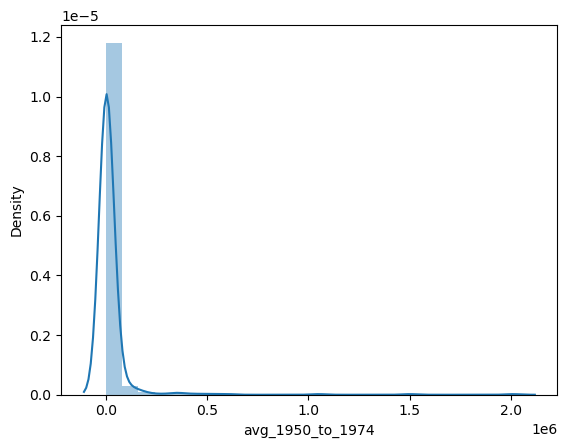

In [18]:
#Checking for extreme values from 1950-1974

sns.distplot(df_1['avg_1950_to_1974'], bins=25) 

In [19]:
# Check the mean

df_1['avg_1950_to_1974'].mean() 

23039.865375186986

In [20]:
# Check the median

df_1['avg_1950_to_1974'].median() 

175.0

In [21]:
# Check the max

df_1['avg_1950_to_1974'].max() 

2010000.0

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_77505/646932506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['avg_2000_to_2020'], bins=25) # Shows extreme values


<Axes: xlabel='avg_2000_to_2020', ylabel='Density'>

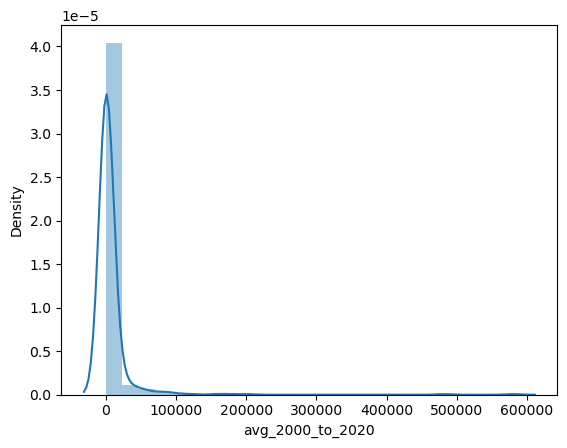

In [22]:
#Checking for extreme values from 2000-2020

sns.distplot(df_1['avg_2000_to_2020'], bins=25)

In [23]:
 # Check the mean
    
df_1['avg_2000_to_2020'].mean()

7005.083609836232

In [24]:
# Check the median

df_1['avg_2000_to_2020'].median() 

72.0

In [25]:
# Check the max

df_1['avg_2000_to_2020'].max() 

580158.0

##### I decided to leave the extreme values in because I was left with so few data points after grouping by species and then removing missing values for both averages.

### 2.b. Data prep for regression analysis

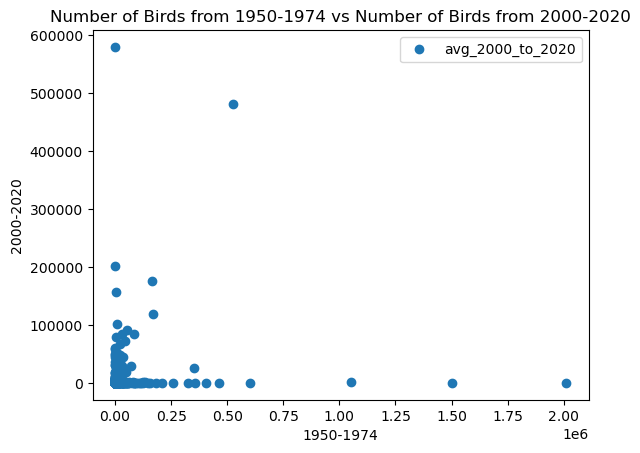

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_1.plot(x = 'avg_1950_to_1974', y='avg_2000_to_2020',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Birds from 1950-1974 vs Number of Birds from 2000-2020')  
plt.xlabel('1950-1974')  
plt.ylabel('2000-2020')  
plt.show()

##### Hypothesis: I think that there will be a positive correlation between the years 1950-1974 and 2000-2020.  In other words, if a species had a small population in 1950-1974, they will have a small population in 2000-2020.  If a species had a large population in 1950-1974, they will have a large population in 2000-2020.

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_1['avg_1950_to_1974'].values.reshape(-1,1)
y = df_1['avg_2000_to_2020'].values.reshape(-1,1)

In [28]:
X

array([[4.25000000e+00],
       [2.50000000e+00],
       [9.10000000e+02],
       [6.25000000e+01],
       [2.80000000e+01],
       [4.00000000e+03],
       [3.91000000e+02],
       [1.45454545e+00],
       [1.20000000e+01],
       [1.60000000e+01],
       [4.36000000e+01],
       [3.39866667e+04],
       [1.33000000e+02],
       [1.30892308e+03],
       [1.78100000e+03],
       [2.60600000e+03],
       [1.06000000e+02],
       [1.80000000e+02],
       [2.59251000e+05],
       [5.40000000e+00],
       [4.92405000e+04],
       [1.78592500e+04],
       [3.65050000e+04],
       [2.42700000e+03],
       [1.70570500e+05],
       [6.33333333e+00],
       [1.50000000e+06],
       [1.91000000e+03],
       [4.57385333e+04],
       [1.59262000e+04],
       [2.00190000e+04],
       [5.24663200e+05],
       [3.52500000e+05],
       [1.92916667e+04],
       [2.08382000e+04],
       [2.93666667e+02],
       [5.14500000e+02],
       [3.33333333e+00],
       [1.48270500e+05],
       [9.99000000e+02],


In [29]:
y

array([[2.47500000e+01],
       [3.33333333e+00],
       [4.64000000e+02],
       [1.14400000e+02],
       [1.65000000e+01],
       [1.53800000e+02],
       [7.68750000e+01],
       [1.00000000e+00],
       [8.00000000e+00],
       [4.84285714e+01],
       [3.50888889e+02],
       [1.40909091e+01],
       [1.03500000e+02],
       [1.43090909e+02],
       [4.68000000e+01],
       [2.30000000e+03],
       [4.20000000e+01],
       [3.70000000e+01],
       [1.00000000e+00],
       [2.00000000e+00],
       [1.82257826e+04],
       [3.76272800e+04],
       [2.12800000e+04],
       [8.76400000e+03],
       [1.18789667e+05],
       [2.25000000e+00],
       [1.11000000e+02],
       [5.12760000e+04],
       [7.24812500e+04],
       [6.97768750e+03],
       [6.69020000e+04],
       [4.81269667e+05],
       [2.63216667e+04],
       [4.38083333e+03],
       [1.18460000e+04],
       [5.80158000e+05],
       [2.17200000e+02],
       [1.50000000e+00],
       [1.87500000e+02],
       [2.43550000e+03],


In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 2.c. Regression analysis

In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

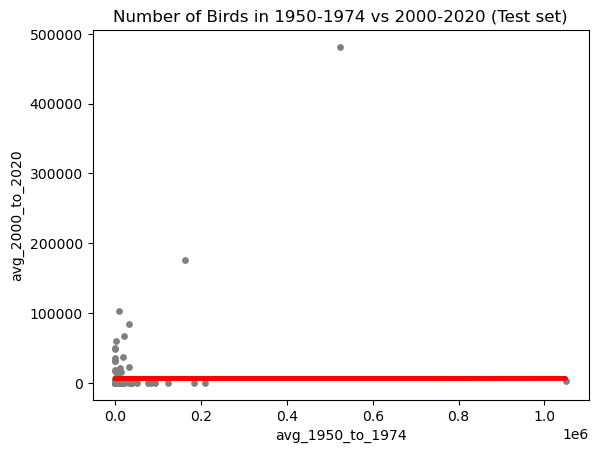

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Birds in 1950-1974 vs 2000-2020 (Test set)')
plot_test.xlabel('avg_1950_to_1974')
plot_test.ylabel('avg_2000_to_2020')
plot_test.show()

##### The line doesn't fit the data very well.  It's stationary and the dots are all over the place; they don't look linear. The model performance statistics confirms this. The MSE is very large and the R2 score is very small.

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00023516]]
Mean squared error:  1741550626.6127348
R2 score:  -0.002811525279497573


In [37]:
y_predicted

array([[6284.822097  ],
       [6284.66786931],
       [6285.27680805],
       [6284.86889442],
       [6327.70182448],
       [6284.66767334],
       [6284.87273542],
       [6284.66712462],
       [6284.67629598],
       [6284.7187037 ],
       [6284.66712462],
       [6284.69863646],
       [6284.6685356 ],
       [6285.22557781],
       [6294.05050206],
       [6284.66735979],
       [6284.74603083],
       [6284.6764005 ],
       [6284.6831157 ],
       [6284.66867278],
       [6284.68970027],
       [6284.74374071],
       [6284.66783011],
       [6284.66726572],
       [6313.86636584],
       [6287.03062972],
       [6284.67447347],
       [6284.66971142],
       [6285.39166163],
       [6284.81540555],
       [6284.77435892],
       [6284.92801439],
       [6284.69369804],
       [6284.67417951],
       [6284.66830044],
       [6284.84885332],
       [6284.66712462],
       [6289.19019428],
       [6285.27972408],
       [6284.71694557],
       [6284.96919142],
       [6284.667

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,168.500000,6284.822097
1,1.600000,6284.667869
2,1121.333333,6285.276808
3,48.000000,6284.868894
4,1.500000,6327.701824
5,1.500000,6284.667673
6,4495.941176,6284.872735
7,1.666667,6284.667125
8,1.000000,6284.676296
9,253.769231,6284.718704


##### Compare how the regression fits the training set

In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00023516]]
Mean squared error:  1182827036.4658618
R2 score:  9.051558770289958e-07


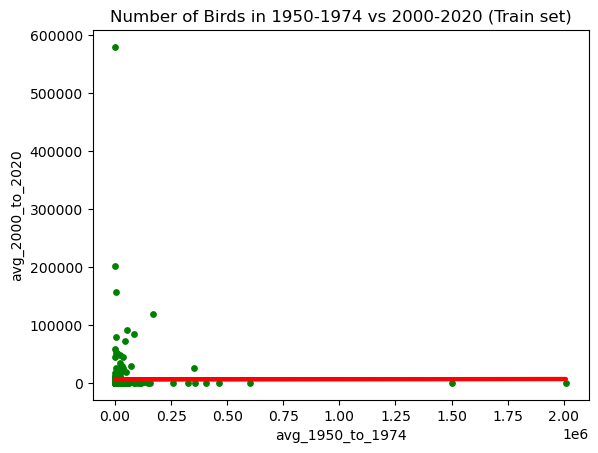

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Birds in 1950-1974 vs 2000-2020 (Train set)')
plot_test.xlabel('avg_1950_to_1974')
plot_test.ylabel('avg_2000_to_2020')
plot_test.show()

##### The model didn't perform well on the test set.  The dataset was very small and the variance is incredibly large.  Counts were taken in many different ways, which biased the data and doesn't allow for predictions.

## 3. All data

### 3.a. Data cleaning

In [43]:
# Display all columns

pd.options.display.max_rows = None

##### Missing values check

In [44]:
# Check for missing values

df.isnull().sum()

id                      0
scientific_name         0
class                   0
order                   0
family                  0
genus                   0
species                 0
common_name             0
country                 0
region                  0
system                  0
avg_1950_to_1974    10036
avg_1975_to_1999     4003
avg_2000_to_2020     3305
1950                12834
1951                12856
1952                12846
1953                12852
1954                12844
1955                12841
1956                12804
1957                12853
1958                12820
1959                12806
1960                12755
1961                12767
1962                12749
1963                12741
1964                12720
1965                12707
1966                12669
1967                12561
1968                12590
1969                12568
1970                11228
1971                11315
1972                11282
1973                11135
1974        

In [45]:
# Remove records where data is missing from both 1950-1974 & 2000-2020 as these are the two variables I will be comparing

df= df[df['avg_1950_to_1974'].notnull() & df['avg_2000_to_2020'].notnull()]

In [46]:
df.shape

(1842, 85)

In [47]:
df.isnull().sum()

id                     0
scientific_name        0
class                  0
order                  0
family                 0
genus                  0
species                0
common_name            0
country                0
region                 0
system                 0
avg_1950_to_1974       0
avg_1975_to_1999      73
avg_2000_to_2020       0
1950                1829
1951                1829
1952                1828
1953                1831
1954                1831
1955                1819
1956                1797
1957                1816
1958                1814
1959                1806
1960                1798
1961                1778
1962                1768
1963                1778
1964                1774
1965                1753
1966                1739
1967                1699
1968                1703
1969                1684
1970                 731
1971                 821
1972                 785
1973                 700
1974                 523
1975                 544


##### Duplicates check

In [48]:
dups = df.duplicated()

In [49]:
dups.shape
# No duplicates

(1842,)

##### Extreme values checks

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_77505/3039930673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_1950_to_1974'], bins=25) # Shows extreme values


<Axes: xlabel='avg_1950_to_1974', ylabel='Density'>

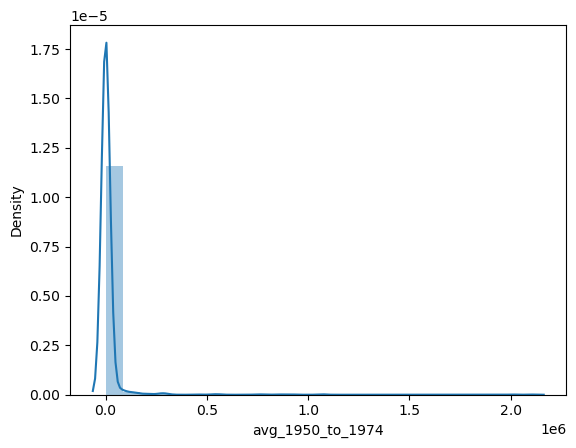

In [50]:
#Checking for extreme values from 1950-1974

sns.distplot(df['avg_1950_to_1974'], bins=25) 

In [51]:
# Check the mean

df['avg_1950_to_1974'].mean() 

11800.451682953311

In [52]:
# Check the median

df['avg_1950_to_1974'].median() 

15.0

In [53]:
# Check the max

df['avg_1950_to_1974'].max() 

2100000.0

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_77505/1793876504.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_2000_to_2020'], bins=25) # Shows extreme values


<Axes: xlabel='avg_2000_to_2020', ylabel='Density'>

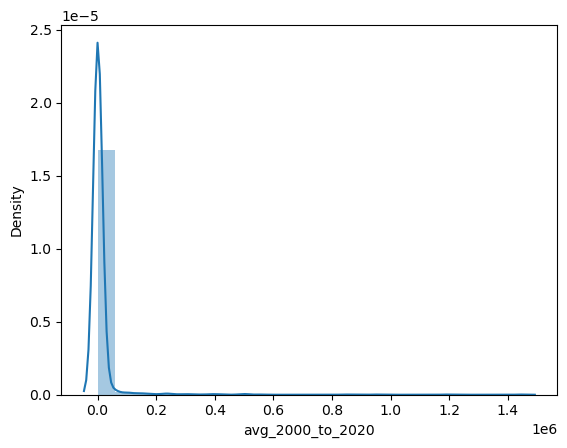

In [54]:
#Checking for extreme values from 2000-2020

sns.distplot(df['avg_2000_to_2020'], bins=25) 

In [55]:
# Check the mean

df['avg_2000_to_2020'].mean() 

10066.883279044518

In [56]:
# Check the median

df['avg_2000_to_2020'].median() 

12.0

In [57]:
# Check the max

df['avg_2000_to_2020'].max() 

1445503.0

### I decided to leave the extreme values in because I already didn't have enough data points and there are so many extreme values that it would be difficult to eliminate them and still be able to analyze the data.

### 3.b. Data prep for regression analysis

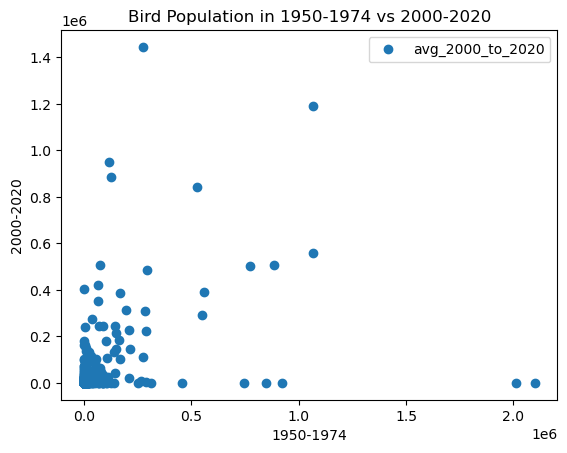

In [58]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'avg_1950_to_1974', y='avg_2000_to_2020',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Bird Population in 1950-1974 vs 2000-2020')  
plt.xlabel('1950-1974')  
plt.ylabel('2000-2020')  
plt.show()

##### Hypothesis: I think that there will be a positive correlation between the years 1950-1974 and 2000-2020.  In other words, if a species had a small population in 1950-1974, they will likely have a small population in 2000-2020 too.  If a species had a large population in 1950-1974, they will likely have a large population in 2000-2020.

In [59]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['avg_1950_to_1974'].values.reshape(-1,1)
y = df['avg_2000_to_2020'].values.reshape(-1,1)

In [60]:
X

array([[1962.],
       [  60.],
       [  34.],
       ...,
       [  93.],
       [  45.],
       [  19.]])

In [61]:
y

array([[11.],
       [44.],
       [ 1.],
       ...,
       [93.],
       [ 4.],
       [80.]])

In [62]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.c. Regression analysis

In [63]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [64]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

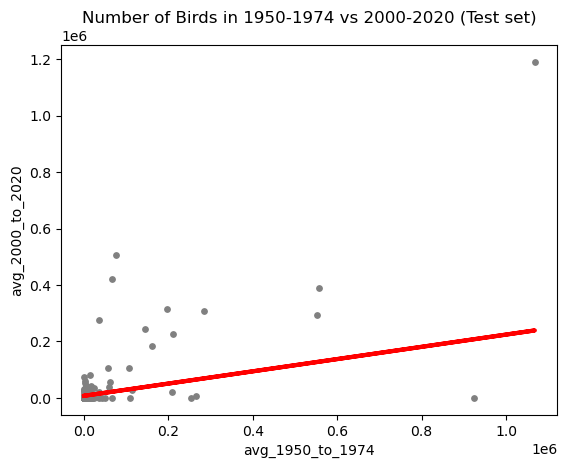

In [66]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Birds in 1950-1974 vs 2000-2020 (Test set)')
plot_test.xlabel('avg_1950_to_1974')
plot_test.ylabel('avg_2000_to_2020')
plot_test.show()

In [67]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [68]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.21690291]]
Mean squared error:  3249928014.958681
R2 score:  0.28344781111965345


In [69]:
y_predicted

array([[  7449.57422831],
       [  7447.83900503],
       [  7446.32068466],
       [  7723.08879767],
       [  7448.05590794],
       [  7446.32068466],
       [  7449.79113122],
       [  7452.17706323],
       [  7451.5263545 ],
       [  7448.05590794],
       [  7446.75449048],
       [  7446.32068466],
       [  7446.32068466],
       [  7448.70661667],
       [ 10515.49685952],
       [  7449.3573254 ],
       [  7454.12918942],
       [  7464.32362618],
       [  7446.97139339],
       [  7449.14042249],
       [  7447.40519921],
       [  7446.53758757],
       [  7467.79407274],
       [  7450.65874286],
       [  7447.1882963 ],
       [  8427.15564316],
       [  7453.47848069],
       [  7446.32068466],
       [  7447.83900503],
       [  7446.53758757],
       [  7446.53758757],
       [  7446.32068466],
       [  7446.53758757],
       [  7461.28698544],
       [  7446.53758757],
       [  7476.03638331],
       [  7458.46724761],
       [  7458.03344179],
       [  74

In [70]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,168.500000,6284.822097
1,1.600000,6284.667869
2,1121.333333,6285.276808
3,48.000000,6284.868894
4,1.500000,6327.701824
5,1.500000,6284.667673
6,4495.941176,6284.872735
7,1.666667,6284.667125
8,1.000000,6284.676296
9,253.769231,6284.718704


##### Compare how the regression fits the training set

In [71]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [72]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [73]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.21690291]]
Mean squared error:  4568271039.207736
R2 score:  0.09705070023235296


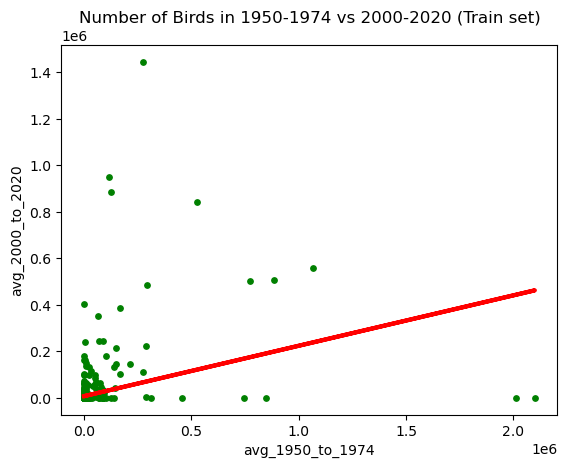

In [74]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Birds in 1950-1974 vs 2000-2020 (Train set)')
plot_test.xlabel('avg_1950_to_1974')
plot_test.ylabel('avg_2000_to_2020')
plot_test.show()

##### Using all data didn't change my results much.  The linear regressionfits a tiny bit better by the MSE is still incredibly large and the R2 score is small.  My hypothesis has not been proven with either dataframe.